In [1]:
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python

In [2]:
bt='https://www.amazon.in'
ul = 'https://www.amazon.in/MJSXJ02CM-1080P-Security-Camera-White/product-reviews/B07HJD1KH4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
cust_name = []   #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [4]:
page = requests.get(ul)
page

<Response [200]>

In [5]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [6]:
len(cust_name)

4572

In [7]:
len(review_title)

4572

In [8]:
len(review_content)

4572

In [9]:
len(rate)

4572

In [10]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

In [11]:
review_title[:] = [titles.rstrip('\n') for titles in review_title]

In [12]:
review_content[:] = [titles.lstrip('\n') for titles in review_content]

In [13]:
review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame()

In [16]:
df

""


In [17]:
df['Customer Name'] = cust_name

In [18]:
df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [19]:
df.head(5)

,Customer Name,Review Title,Rating,Reviews
0,Rahul T,Overall I'll call it value for money although ...,4.0 out of 5 stars,It consumes around 10gb of storage in 24hour...
1,Sukdeb Das,cannot connect the device,1.0 out of 5 stars,I cannot connect the device with my Jiofi s...
2,Amazon Customer,Under 3K best ip cam from Mi,5.0 out of 5 stars,Pros:1) Simple install (only first time you ...
3,Pothi Kalimuthu,"Other than initial hiccups, some (Mi Home app)...",3.0 out of 5 stars,Remember... nothing is perfect. Xiaomi has a...
4,Krish B,Installation Issue,1.0 out of 5 stars,Any future buyer.. this product may be a goo...


In [20]:
df.to_csv(r'E:fill.csv',index = True)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


In [22]:
data = pd.read_csv("../input/reviews/E_fill.csv")

In [23]:
data.head()

,Unnamed: 0,Customer Name,Review Title,Rating,Reviews
0,0,Rahul T,Overall I'll call it value for money although ...,4.0 out of 5 stars,It consumes around 10gb of storage in 24hour...
1,1,Sukdeb Das,cannot connect the device,1.0 out of 5 stars,I cannot connect the device with my Jiofi s...
2,2,Amazon Customer,Under 3K best ip cam from Mi,5.0 out of 5 stars,Pros:1) Simple install (only first time you ...
3,3,Pothi Kalimuthu,"Other than initial hiccups, some (Mi Home app)...",3.0 out of 5 stars,Remember... nothing is perfect. Xiaomi has a...
4,4,Krish B,Installation Issue,1.0 out of 5 stars,Any future buyer.. this product may be a goo...


In [24]:
data = data.drop(data.columns[[0]], axis=1)

In [25]:
data.head()

,Customer Name,Review Title,Rating,Reviews
0,Rahul T,Overall I'll call it value for money although ...,4.0 out of 5 stars,It consumes around 10gb of storage in 24hour...
1,Sukdeb Das,cannot connect the device,1.0 out of 5 stars,I cannot connect the device with my Jiofi s...
2,Amazon Customer,Under 3K best ip cam from Mi,5.0 out of 5 stars,Pros:1) Simple install (only first time you ...
3,Pothi Kalimuthu,"Other than initial hiccups, some (Mi Home app)...",3.0 out of 5 stars,Remember... nothing is perfect. Xiaomi has a...
4,Krish B,Installation Issue,1.0 out of 5 stars,Any future buyer.. this product may be a goo...


In [26]:
data.dtypes

Customer Name    object
Review Title     object
Rating           object
Reviews          object
dtype: object

In [27]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]

In [28]:
data['Rating']

0       4.0
1       1.0
2       5.0
3       3.0
4       1.0
       ... 
4567    5.0
4568    4.0
4569    5.0
4570    5.0
4571    5.0
Name: Rating, Length: 4572, dtype: object

In [29]:
data['Rating'].value_counts(normalize=True)*100

5.0    61.198600
4.0    18.416448
1.0    11.264217
3.0     6.277340
2.0     2.843395
Name: Rating, dtype: float64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  4572 non-null   object
 1   Review Title   4572 non-null   object
 2   Rating         4572 non-null   object
 3   Reviews        4572 non-null   object
dtypes: object(4)
memory usage: 143.0+ KB


In [31]:
ratings=data.groupby(['Rating']).count()
ratings

,Customer Name,Review Title,Reviews
Rating,,,
1.0,515,515,515
2.0,130,130,130
3.0,287,287,287
4.0,842,842,842
5.0,2798,2798,2798


Text(0, 0.5, 'Count')

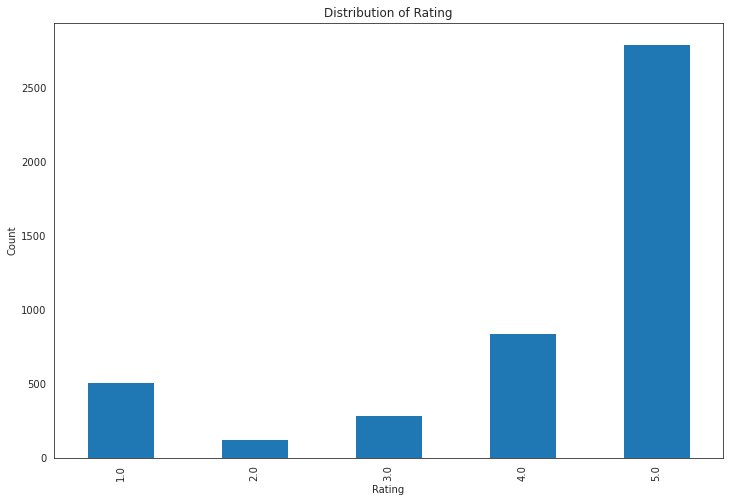

In [32]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

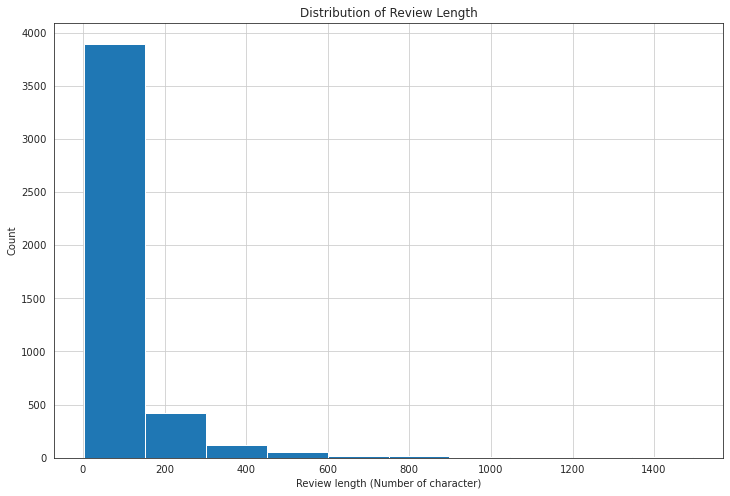

In [33]:
review_length = data["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

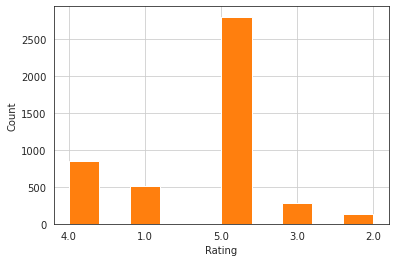

In [34]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [35]:
Reviews=data.iloc[:,[3]]

In [36]:
Reviews.shape

(4572, 1)

In [37]:
Reviews.describe()

,Reviews
count,4572
unique,3476
top,Good
freq,257


In [38]:
Reviews.head()

,Reviews
0,It consumes around 10gb of storage in 24hour...
1,I cannot connect the device with my Jiofi s...
2,Pros:1) Simple install (only first time you ...
3,Remember... nothing is perfect. Xiaomi has a...
4,Any future buyer.. this product may be a goo...


In [39]:
# removing customer name and reviw title column as they have not that significance in output##
data.drop(["Customer Name","Review Title"],axis=1,inplace=True)

In [40]:
data.head()

,Rating,Reviews
0,4.0,It consumes around 10gb of storage in 24hour...
1,1.0,I cannot connect the device with my Jiofi s...
2,5.0,Pros:1) Simple install (only first time you ...
3,3.0,Remember... nothing is perfect. Xiaomi has a...
4,1.0,Any future buyer.. this product may be a goo...


In [41]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###
data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))


In [42]:
## removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))
            

In [43]:
## Remove Numbers from review...##
data['Reviews']=data['Reviews'].str.replace('[0-9]','')


In [44]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords


In [45]:
stop_words=stopwords.words('english')

In [46]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


In [47]:
data.head(5)

,Rating,Reviews
0,4.0,consumes around gb storage hours hd modepros n...
1,1.0,cannot connect device jiofi please help
2,5.0,pros simple install first time need configure ...
3,3.0,remember nothing perfect xiaomi already releas...
4,1.0,future buyer product may good one lucky ones e...


In [48]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [49]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [50]:
data['Reviews'].head()

0    consumes around gb storage hour hd modepros ni...
1              cannot connect device jiofi please help
2    pro simple install first time need configure c...
3    remember nothing perfect xiaomi already releas...
4    future buyer product may good one lucky one ex...
Name: Reviews, dtype: object

In [51]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aap  ab  abd  ability  able  about  abruptly  absolute  absolutely  \
0       0   0    0        0     0      0         0         0           0   
1       0   0    0        0     0      0         0         0           0   
2       0   0    0        0     0      0         0         0           0   
3       0   0    0        0     1      0         0         0           0   
4       0   0    0        0     1      0         0         0           0   
...   ...  ..  ...      ...   ...    ...       ...       ...         ...   
4567    0   0    0        0     0      0         0         0           0   
4568    0   0    0        0     0      0         0         0           0   
4569    0   0    0        0     0      0         0         0           0   
4570    0   0    0        0     0      0         0         0           0   
4571    0   0    0        0     0      0         0         0           0   

      absurd  ...  रहन  लग  लन  वजह  वल  सकत  सब  सर  हक  हतर  
0          0  ...    0 

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)


  (0, 4254)	0.11107326146029994
  (0, 1832)	0.1279189560498743
  (0, 638)	0.10789665769057337
  (0, 646)	0.06692317861100079
  (0, 2650)	0.13156982748095455
  (0, 1099)	0.10994446297171973
  (0, 119)	0.09473624272284405
  (0, 2733)	0.06289903421381751
  (0, 3889)	0.11228574856448849
  (0, 4068)	0.09233765028101915
  (0, 1931)	0.1279189560498743
  (0, 1922)	0.10094510607611658
  (0, 4921)	0.1249359768911719
  (0, 2991)	0.08195406941751905
  (0, 713)	0.11830212630138928
  (0, 889)	0.0859535921566644
  (0, 2326)	0.08839197648355611
  (0, 2798)	0.06866448049063796
  (0, 2198)	0.13156982748095455
  (0, 886)	0.0748666150390949
  (0, 4135)	0.09431125548633393
  (0, 4918)	0.0859535921566644
  (0, 4084)	0.23660425260277856
  (0, 702)	0.1249359768911719
  (0, 3015)	0.1279189560498743
  :	:
  (4571, 4468)	0.18862499921239673
  (4571, 4176)	0.18339092971487642
  (4571, 3067)	0.17549861528280178
  (4571, 325)	0.10424621136345195
  (4571, 2047)	0.13083269906754214
  (4571, 1151)	0.19188874462297845


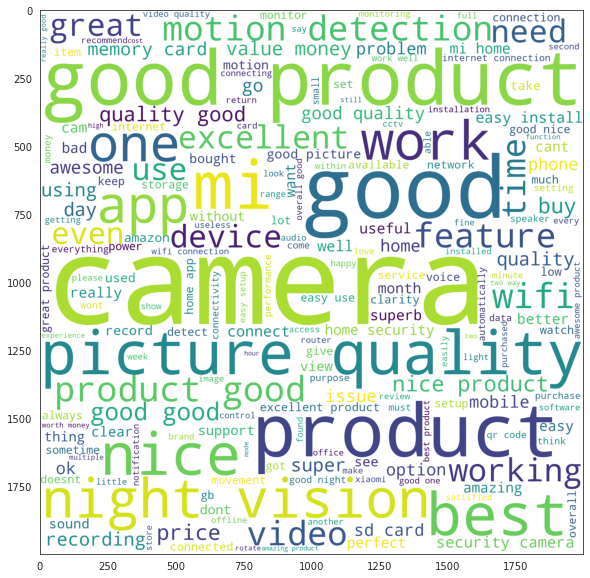

In [53]:
Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [54]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[0:20]
freq


good       1768
product    1323
camera     1288
quality     789
nice        447
mi          386
home        364
best        355
picture     322
work        314
easy        310
motion      307
night       301
one         291
wifi        287
card        283
app         282
video       267
vision      261
working     260
dtype: int64

In [55]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')
  


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,consumes around gb storage hour hd modepros ni...,0.500000
1,cannot connect device jiofi please help,0.000000
2,pro simple install first time need configure c...,0.205556
3,remember nothing perfect xiaomi already releas...,0.294565
4,future buyer product may good one lucky one ex...,0.212821


In [58]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Rating,Reviews,polarity
0,4.0,consumes around gb storage hour hd modepros ni...,0.500000
2,5.0,pro simple install first time need configure c...,0.205556
3,3.0,remember nothing perfect xiaomi already releas...,0.294565
4,1.0,future buyer product may good one lucky one ex...,0.212821
5,5.0,best home security video recording day gb,1.000000


In [59]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative') 


In [60]:
sent_type(data['polarity'])


positive
neutral
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
po

positive
positive
positive
negative
positive
positive
positive
neutral
positive
positive
positive
positive
positive
positive
neutral
positive
neutral
positive
positive
positive
neutral
negative
neutral
positive
neutral
positive
neutral
positive
positive
positive
negative
negative
neutral
neutral
positive
positive
positive
negative
positive
negative
positive
neutral
positive
positive
neutral
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
neutral
neutral
positive
positive
positive
neutral
positive
positive
positive
neutral
positive
positive
positive
positive
positive
negative
positive
neutral
positive
positive
positive
positive
positive
neutral
positive
positive
positive
positive
neutral
positive
positive
neutral
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
neutral
neutral
positive
neutral
positive
positive
positive
positive
neutral
neutral
positive
positiv

positive
neutral
positive
neutral
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
neutral
neutral
positive
positive
positive
positive
positive
neutral
positive
neutral
neutral
neutral
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
neutral
positive
neutral
neutral
positive
positive
positive
neutral
positive
positive
neutral
positive
neutral
neutral
positive
positive
positive
positive
positive
negative
neutral
positive
neutral
positive
neutral
neutral
positive
positive
neutral
positive
positive
neutral
positive
positive
negative
positive
positive
positive
neutral
neutral
positive
positive
positive
positive
neutral
neutral
positive
positive
positive
neutral
positive
positi

In [61]:
data["category"]=data['polarity']

In [62]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"


In [63]:
data["category"]=data["category"].astype('category')
data.dtypes

Rating        object
Reviews       object
polarity     float64
category    category
dtype: object

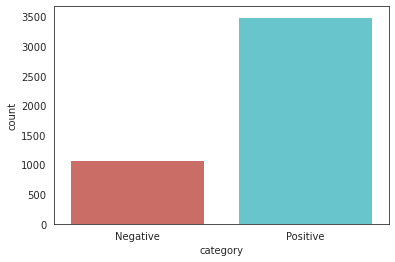

In [64]:
sns.countplot(x='category',data=data,palette='hls')

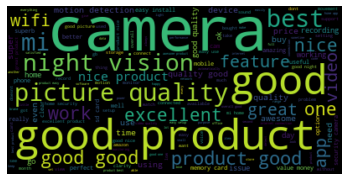

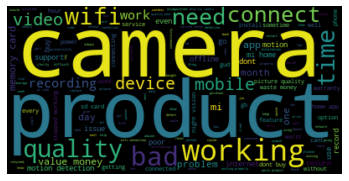

In [65]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

In [73]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [74]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [75]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


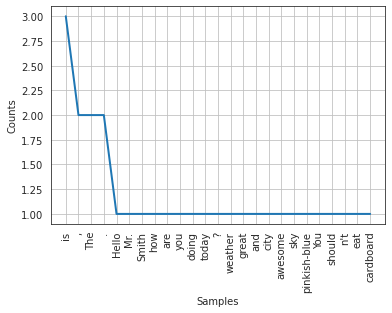

In [76]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [77]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'same', 'because', "you'll", 'ourselves', 'of', 'an', 'below', 'himself', "it's", 'off', 'her', 'this', "hadn't", 'there', 'they', "aren't", "you'd", 'is', 'doing', "doesn't", 'over', 'why', 've', 'been', 'once', 'not', 'wasn', 'when', 'some', 'after', 'having', 'do', 'yourselves', 'o', "hasn't", 'he', "couldn't", 'itself', 'herself', 'few', 'just', 'can', 'on', 'its', 'y', "didn't", 'had', 'i', 'we', 'with', 'the', 'any', "you're", 'have', 'here', 'as', 'it', 'for', 'wouldn', 'other', 'she', 'from', 'isn', 'needn', 'under', 'too', 'hasn', 'hers', 'in', 'which', 'd', 'be', 'and', 'but', 'yourself', 'll', 'couldn', 'has', 'm', 'ma', 'ain', 'while', 'before', 'most', 'only', 'each', "haven't", 'are', 'weren', 'myself', 'who', 're', 'these', 'doesn', 'our', 'won', 'mustn', 'until', 'now', 'whom', 'both', 'were', "weren't", 'my', 'where', 'you', 'being', 'don', 'those', 'what', 'then', 'to', "shan't", 'shan', 'by', 'yours', 'further', 'aren', "won't", 'should', 'a', 'again', 'own', 'up', 

In [80]:
filtered_sent=[]
for w in tokenized_text:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_text)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]
Filterd Sentence: ['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [81]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]
Stemmed Sentence: ['hello mr. smith, how are you doing today?', 'the weather is great, and city is awesome.', 'the sky is pinkish-blue.', "you shouldn't eat cardboard"]


In [82]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


In [83]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."

In [84]:
tokens=nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [85]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]